Following the 6 steps of CRISP-DM:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Introduction and Business Understanding
Airbnb is now a global brand of business that is applied everywhere in the U.S.A. It provides a unique way for users to experience travelling since 2008. Their business runs on customer data and requires rigorous data analytics in order to grow and solve issues revolving travellers and hosts. They, Airbnb, have graciously provided their data for Seattle on Kaggle for free for the public to take a jab at data analysis.

This notebook will be using the Airbnb Seattle datasets to answer these 3 main questions:

1. Is pricing based on the concept "More is better"?
2. When is the busiest time in Seattle?
3. What should you write in your "Summary"?

Let's first import the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS

# Directory browsing
import os
print(os.listdir('data'))
PROJECT_DIR = "." # os.getcwd()
DATA_DIR = PROJECT_DIR + '/data/'
DATA_DIR

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hungnguyen/nltk_data...


['reviews.csv', 'listings.csv', 'calendar.csv']


[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hungnguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hungnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'./data/'

# Data Understanding
We will be using 3 datasets provided.
1. listings.csv: all the Airbnb in Seattle, with descriptions, host information, and review scores
2. reviews.csv: detailed reviews from the customers
3. calendar.csv: price and availability of a listing for a given day


Let's read the data and do a simple look-through (dimensions, data types, Nulls)

In [2]:
# retrieve Data
cal_df = pd.read_csv(DATA_DIR+'calendar.csv')
listings_df = pd.read_csv(DATA_DIR+'listings.csv')
reviews_df = pd.read_csv(DATA_DIR+'reviews.csv')

print(cal_df)
cal_df.sample(10)

         listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]


,listing_id,date,available,price
509402,808134,2016-08-18,f,NaN
859353,8566501,2016-05-26,t,$93.00
265229,9416551,2016-08-30,t,$82.00
1348448,51826,2016-05-21,t,$97.00
1312387,1307898,2016-08-03,t,$450.00
569154,6807981,2016-05-02,f,NaN
363870,4468524,2016-11-29,t,$44.00
693719,9615941,2016-08-10,t,$49.00
1023030,1039766,2016-10-30,t,$85.00
704026,3544964,2016-11-05,t,$45.00


In [3]:
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1517,3489083,https://www.airbnb.com/rooms/3489083,20160104002432,2016-01-04,Seattle Ocean View,"Perfectly located on the border of downtown, t...",WOnderful City and Ocean Views at any time of ...,"Perfectly located on the border of downtown, t...",none,"The very central part of Seattle, full of ente...",...,10.0,f,NaN,WASHINGTON,f,strict,f,f,3,0.28
1725,7902229,https://www.airbnb.com/rooms/7902229,20160104002432,2016-01-04,Private Room and 4 Person Jacuzzi,Lovely bedroom setup with a full bathroom. I...,Super private room and private Jacuzzi room to...,Lovely bedroom setup with a full bathroom. I...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
2425,20868,https://www.airbnb.com/rooms/20868,20160104002432,2016-01-04,2 BR Spacious Mother-in-Law Condo,NaN,Whether you're in Seattle for business or plea...,Whether you're in Seattle for business or plea...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.35
608,789966,https://www.airbnb.com/rooms/789966,20160104002432,2016-01-04,Cute 1BR in Madison Valley!,NaN,Hello! I have a lovely 1 BR apartment in Madis...,Hello! I have a lovely 1 BR apartment in Madis...,none,NaN,...,9.0,f,NaN,WASHINGTON,f,moderate,f,t,1,1.60
141,4672934,https://www.airbnb.com/rooms/4672934,20160104002432,2016-01-04,Modern 3BR Freestanding Townhouse,Welcome to the heart of the 'Ballard Brewery D...,Welcome to the heart of the 'Ballard Brewery D...,Welcome to the heart of the 'Ballard Brewery D...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.06


In [4]:
reviews_df.sample(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
12774,7620570,42464122,2015-08-13,37239531,Rachel,"Beatrice was a wonderful host, and her home wa..."
15740,20927,26135502,2015-02-04,26085183,Matthew,The cottage was great. Very peaceful. Brad pro...
10003,2297917,47077716,2015-09-15,6336023,James,"What a great place! Warm and cozy, yet spacio..."
5137,3066740,42025279,2015-08-10,560834,Jimmy,"Fantastic hosts, lovely boat. Cheerful tour a..."
65820,1954452,52939722,2015-11-02,22713093,Jenny,Daniela was very nice and easy to work with. S...
6321,704764,48869559,2015-09-29,16340540,Mike,We arrived early in the afternoon the first da...
40582,3265292,27556128,2015-03-07,10993947,Klaasjan,What does it say when you return to the same c...
9112,2004931,38447903,2015-07-15,11978631,Hitesh,:)
73179,3040278,51264126,2015-10-19,14811282,Terra,Such a cozy place! I felt so warm and welcome...
30967,353347,2010285,2012-08-17,2801319,Mary,"Nice quiet neighborhood, clean house, comforta..."


In [5]:
def print_rowcol(df, name):
    print("%s has %d rows and %d columns." % (name, len(df), len(df.columns)))

print_rowcol(listings_df, "listings_df")
print_rowcol(reviews_df, "reviews_df")
print_rowcol(cal_df, "cal_df")

listings_df has 3818 rows and 92 columns.
reviews_df has 84849 rows and 6 columns.
cal_df has 1393570 rows and 4 columns.


In [6]:
def graph_nan_count(df):
    plot = df.isnull().sum()
    (plot[plot != 0].sort_values(ascending=False) / len(df)).plot.bar()

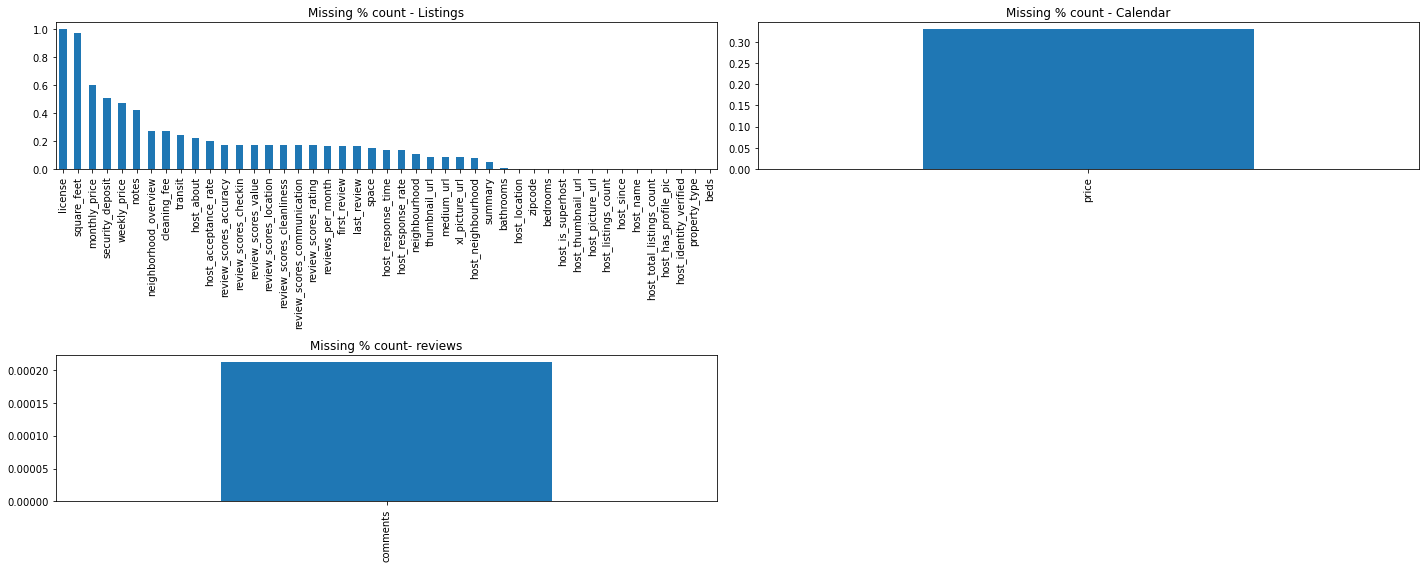

In [7]:
# count Nans

plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
graph_nan_count(listings_df)
plt.title("Missing % count - Listings")

plt.subplot(2,2,2)
graph_nan_count(cal_df)
plt.title("Missing % count - Calendar")

plt.subplot(2,2,3)
graph_nan_count(reviews_df)
plt.title("Missing % count- reviews")

plt.tight_layout()

 # Clean data:
As we see above, it's essential to whether remove the Nan columns entirely, or fill them with some default values. Based on this, I have selected 24 columns in "Listings" to work with.

- Fill Nan
- Convert Price column from string '$85' to float 85
- Use only relevant columns (relevant in meaning, minimal Nan-count, and to answering the question)

## Prepare listings.csv
For the columns, we could split them into 4 groups: text, category, numerical, text_list (this last one is special and I didn't have the chance to use it)

In [8]:
cols = ['id','name','summary','space','description','instant_bookable', 
        'neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
        'host_response_time','review_scores_rating','property_type','room_type',
        'accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']
q1_df = listings_df[cols]
q1_df.head()

,id,name,summary,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,956883,Maija,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,5177328,Andrea,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,16708587,Jill,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,9851441,Emily,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,1452570,Emily,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


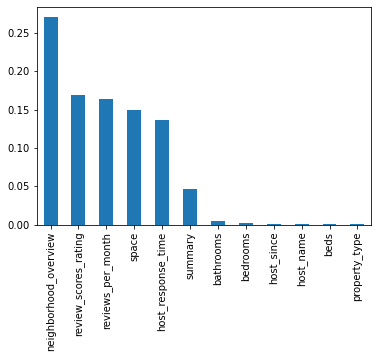

In [9]:
graph_nan_count(q1_df)

In [10]:
q1_df.fillna(0, inplace=True)

/Users/hungnguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
price_col = q1_df['price']

# Convert to float
prices = []
for price in price_col:
    price = float(price[1:].replace(',',''))
    prices.append(price)

#replace the price column with the new column
q1_df.loc[:,'price'] = prices

q1_df['price']

/Users/hungnguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

### Distinguishing column type

In [12]:
text_cols = ['name', 'summary','space', 'description','neighborhood_overview']
text_list_cols = ['amenities'] # { ..., format}
cat_cols = ['instant_bookable','neighbourhood_cleansed','cancellation_policy','property_type','room_type']
num_cols = ['review_scores_rating','accommodates','bathrooms', 'bedrooms','beds','reviews_per_month']

## Prepare calendar.csv

The **calendar.csv** has 4 columns. We need to
- extract date into an easier format (**month**, **year**, **month_year**).
- convert **price** and **listing_id** to the appropriate data types (float and string respectively).

In [13]:
# date
cal_df['month'] = pd.DatetimeIndex(cal_df['date']).month
cal_df['year'] = pd.DatetimeIndex(cal_df['date']).year
cal_df['month_year'] = pd.to_datetime(cal_df['date']).dt.to_period('M')

# price
pr_func = lambda x: float((x[1:].replace(',',''))) if type(x) != float else x
cal_df['price'] = cal_df['price'].apply(pr_func)

# make sure id is not auto-calculated by functions in later cells
cal_df['listing_id'] = cal_df['listing_id'].astype(str)

cal_df.dtypes

listing_id       object
date             object
available        object
price           float64
month             int64
year              int64
month_year    period[M]
dtype: object

# Analyze and Visualize

## Q1. Is pricing based on the concept "More is better"? 
We're considering typical factors like Location, time of year, and what the Airbnb provides.

Link: https://www.airbnb.com/help/article/125/how-pricing-works

Further tax in Washington: https://www.airbnb.com/help/article/2336/occupancy-tax-collection-and-remittance-by-airbnb-in-washington

## Distribution of numerical features on Price

In [14]:
num_dist = q1_df[num_cols + ['price']]
for col in num_cols:
    num_dist = num_dist[num_dist[col] > 0] 

num_dist

,review_scores_rating,accommodates,bathrooms,bedrooms,beds,reviews_per_month,price
0,95.0,4,1.0,1.0,1.0,4.07,85.0
1,96.0,4,1.0,1.0,1.0,1.48,150.0
2,97.0,11,4.5,5.0,7.0,1.15,975.0
4,92.0,6,2.0,3.0,3.0,0.89,450.0
5,95.0,2,1.0,1.0,1.0,2.45,120.0
...,...,...,...,...,...,...,...
3810,92.0,5,1.0,2.0,3.0,1.56,154.0
3811,100.0,3,1.0,1.0,1.0,0.63,65.0
3812,96.0,4,1.0,1.0,2.0,4.01,95.0
3813,80.0,6,2.0,3.0,3.0,0.30,359.0


### Number of bedrooms vs. price of listing

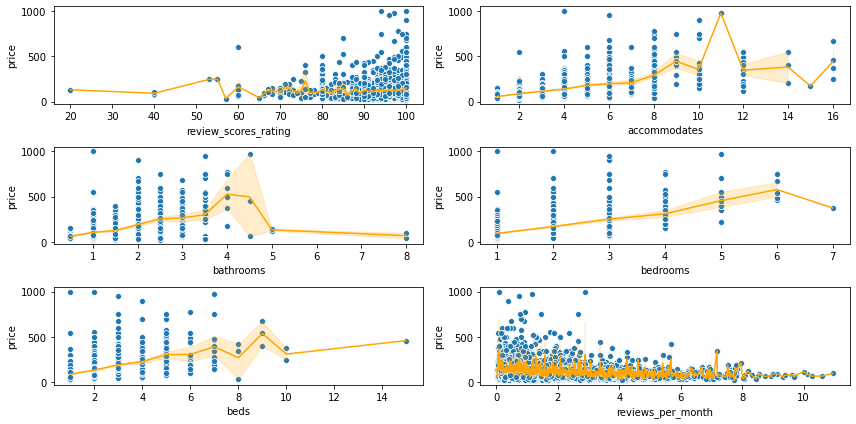

In [16]:
def plot_numerical_vs_price(X, df=num_dist, dim_x =3, dim_y=2):
    plt.figure(figsize=(12,6))
    for i in range(dim_x * dim_y):
        plt.subplot(dim_x, dim_y, i + 1)
        sns.scatterplot(data=num_dist, x=X[i], y="price")
        sns.lineplot(data=num_dist, x=X[i], y="price", color='orange')
    
    plt.tight_layout()
    plt.show()

plot_numerical_vs_price(num_cols)

It's fairly easy to see that more accommodations means higher price. We could also see that sometimes more isn't better, but rather it might depends on the location, or view of the sky, or the neighborhood (which we can't exactly quantify).

From this, we also tell that lower reviews_per_month would indicate a certain satisfaction which might lead to higher prices. This could just be depending on human psychology, which again we can't quantify or account for as of this project. 

Though it is interesting to see that lower-priced listings tend to have more reviews, and that higher review_scores_rating tend to **HAVE** higher price, but on average it's not nessary a score of 100 equates to *luxury*.

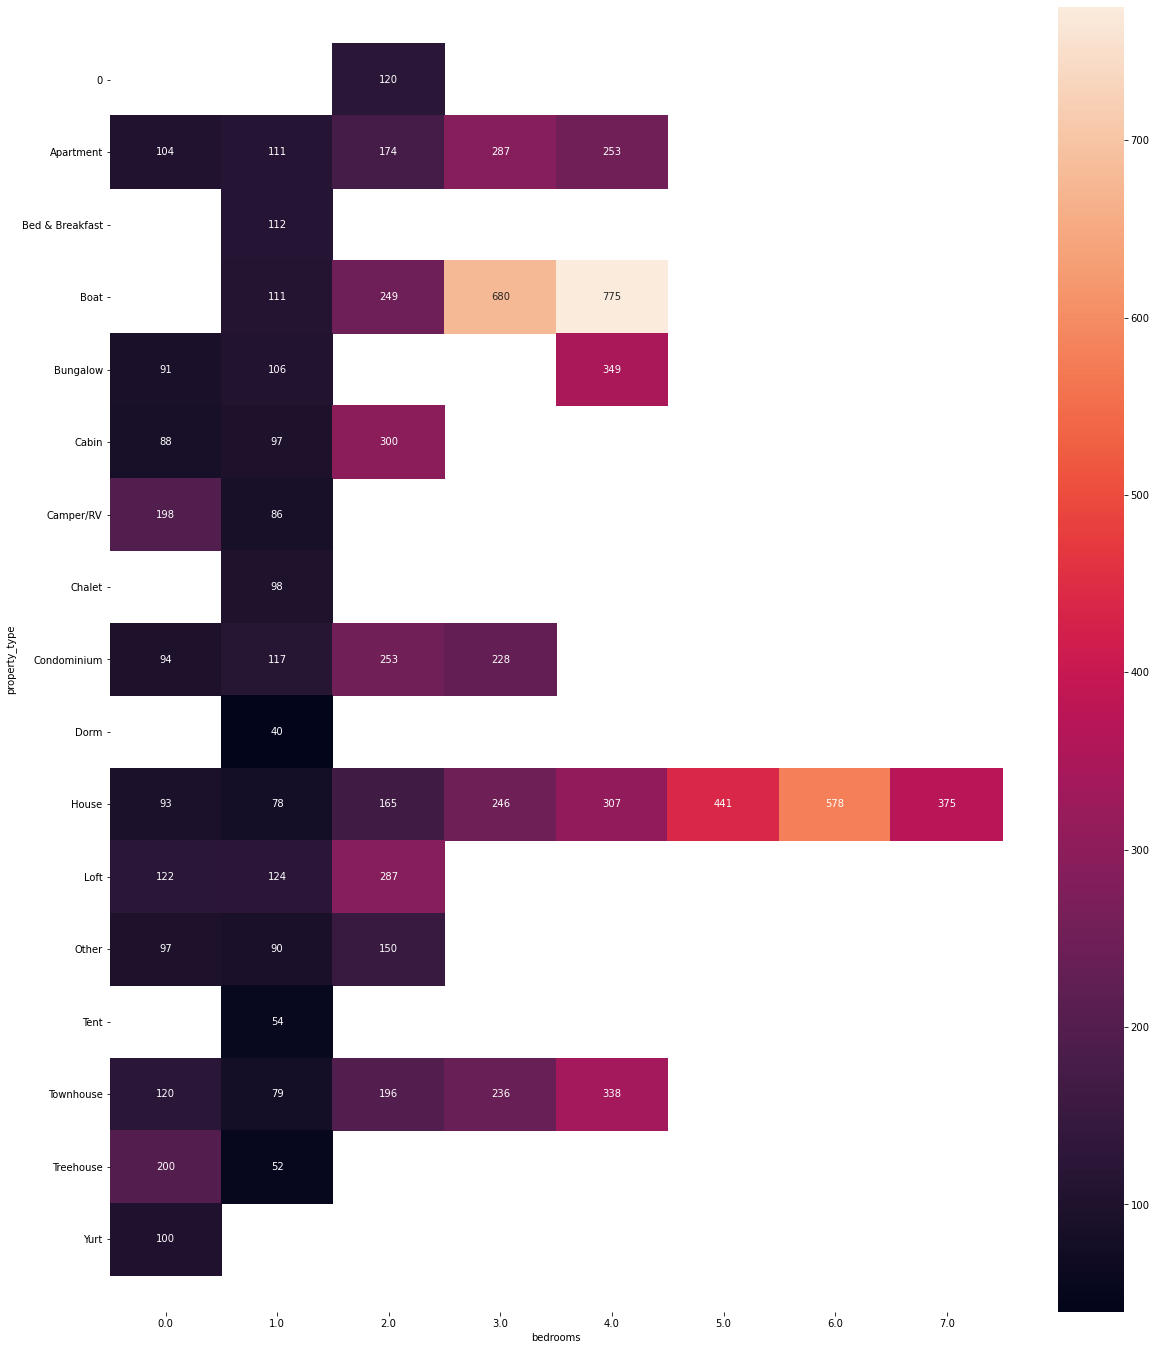

In [17]:
def plot_heatmap_price(df, col1='neighbourhood_cleansed', col2='bedrooms'):
    '''
    Plot a Heatmap by aggregating col1 and col2 and getting the mean() of 'price' column.
    Be careful when using this function because it's specific to this context.
    
    Code inspired by https://www.kaggle.com/chaitanyakck
    '''
    ax = sns.heatmap(df.groupby([col1, col2]).price.mean().unstack(),annot=True, fmt=".0f")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)


plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'property_type', 'bedrooms')

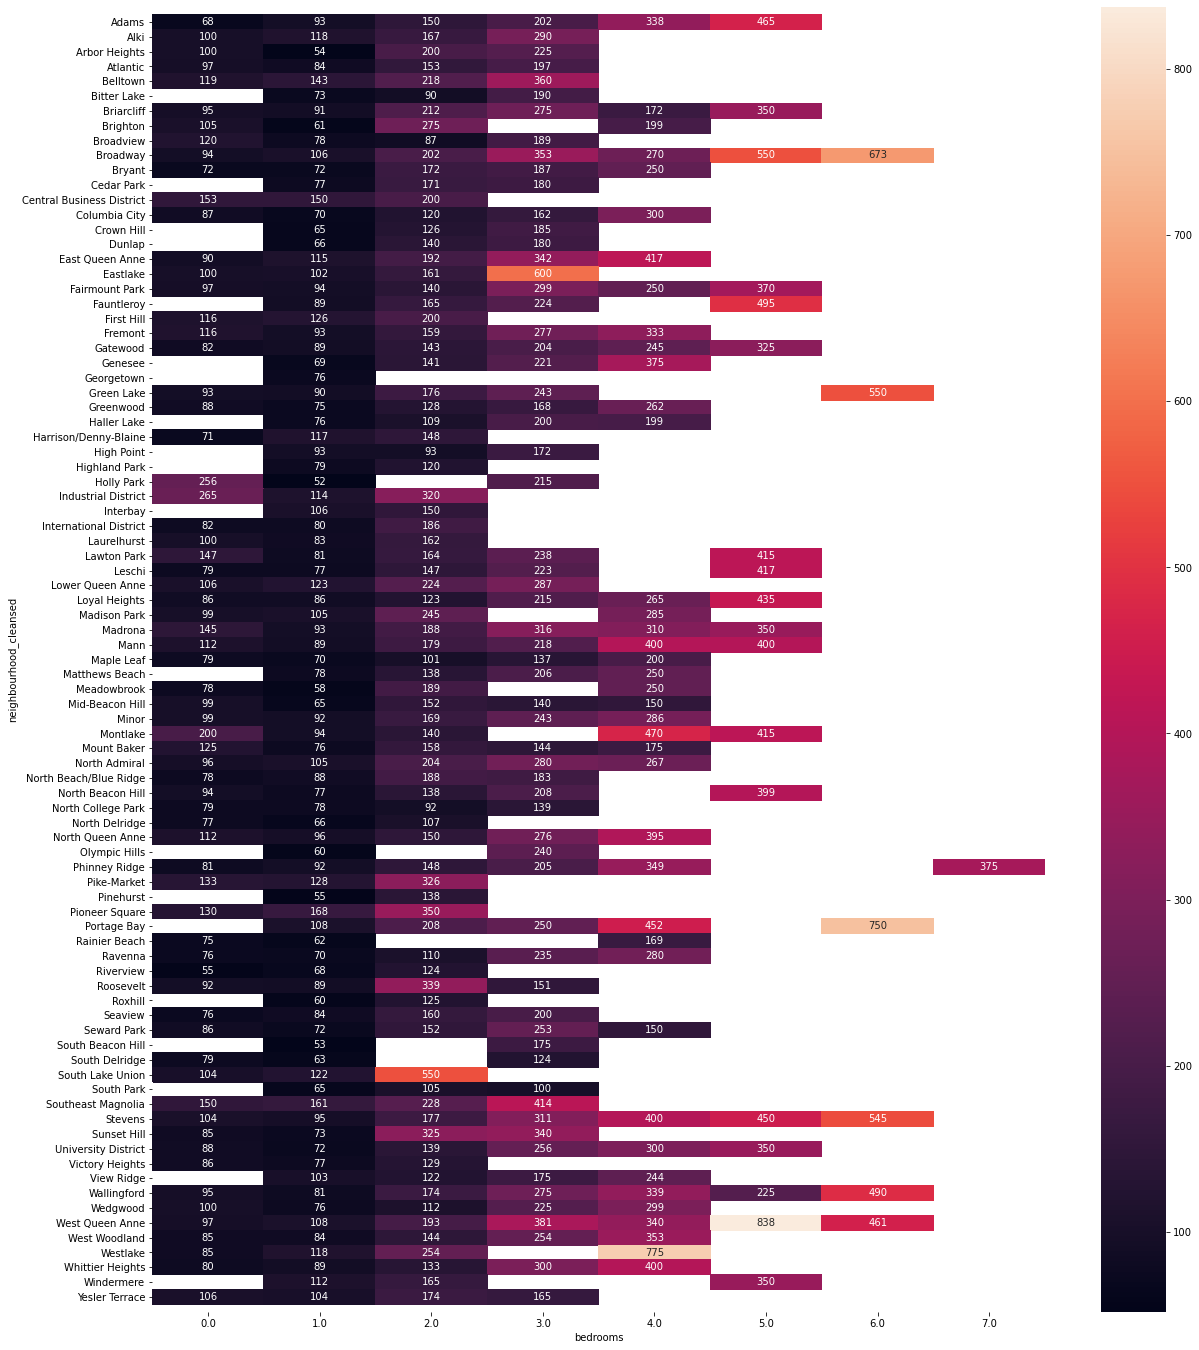

In [18]:
plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'neighbourhood_cleansed', 'bedrooms')

## Analyzing categorical features on price

In [19]:
cat_dist = q1_df[cat_cols + ['price']]
cat_dist

,instant_bookable,neighbourhood_cleansed,cancellation_policy,property_type,room_type,price
0,f,West Queen Anne,moderate,Apartment,Entire home/apt,85.0
1,f,West Queen Anne,strict,Apartment,Entire home/apt,150.0
2,f,West Queen Anne,strict,House,Entire home/apt,975.0
3,f,West Queen Anne,flexible,Apartment,Entire home/apt,100.0
4,f,West Queen Anne,strict,House,Entire home/apt,450.0
...,...,...,...,...,...,...
3813,f,Fremont,strict,House,Entire home/apt,359.0
3814,f,Portage Bay,moderate,Apartment,Entire home/apt,79.0
3815,f,Rainier Beach,moderate,House,Entire home/apt,93.0
3816,f,Madison Park,moderate,Condominium,Entire home/apt,99.0


In [20]:
cat_dist.nunique()

instant_bookable            2
neighbourhood_cleansed     87
cancellation_policy         3
property_type              17
room_type                   3
price                     273
dtype: int64

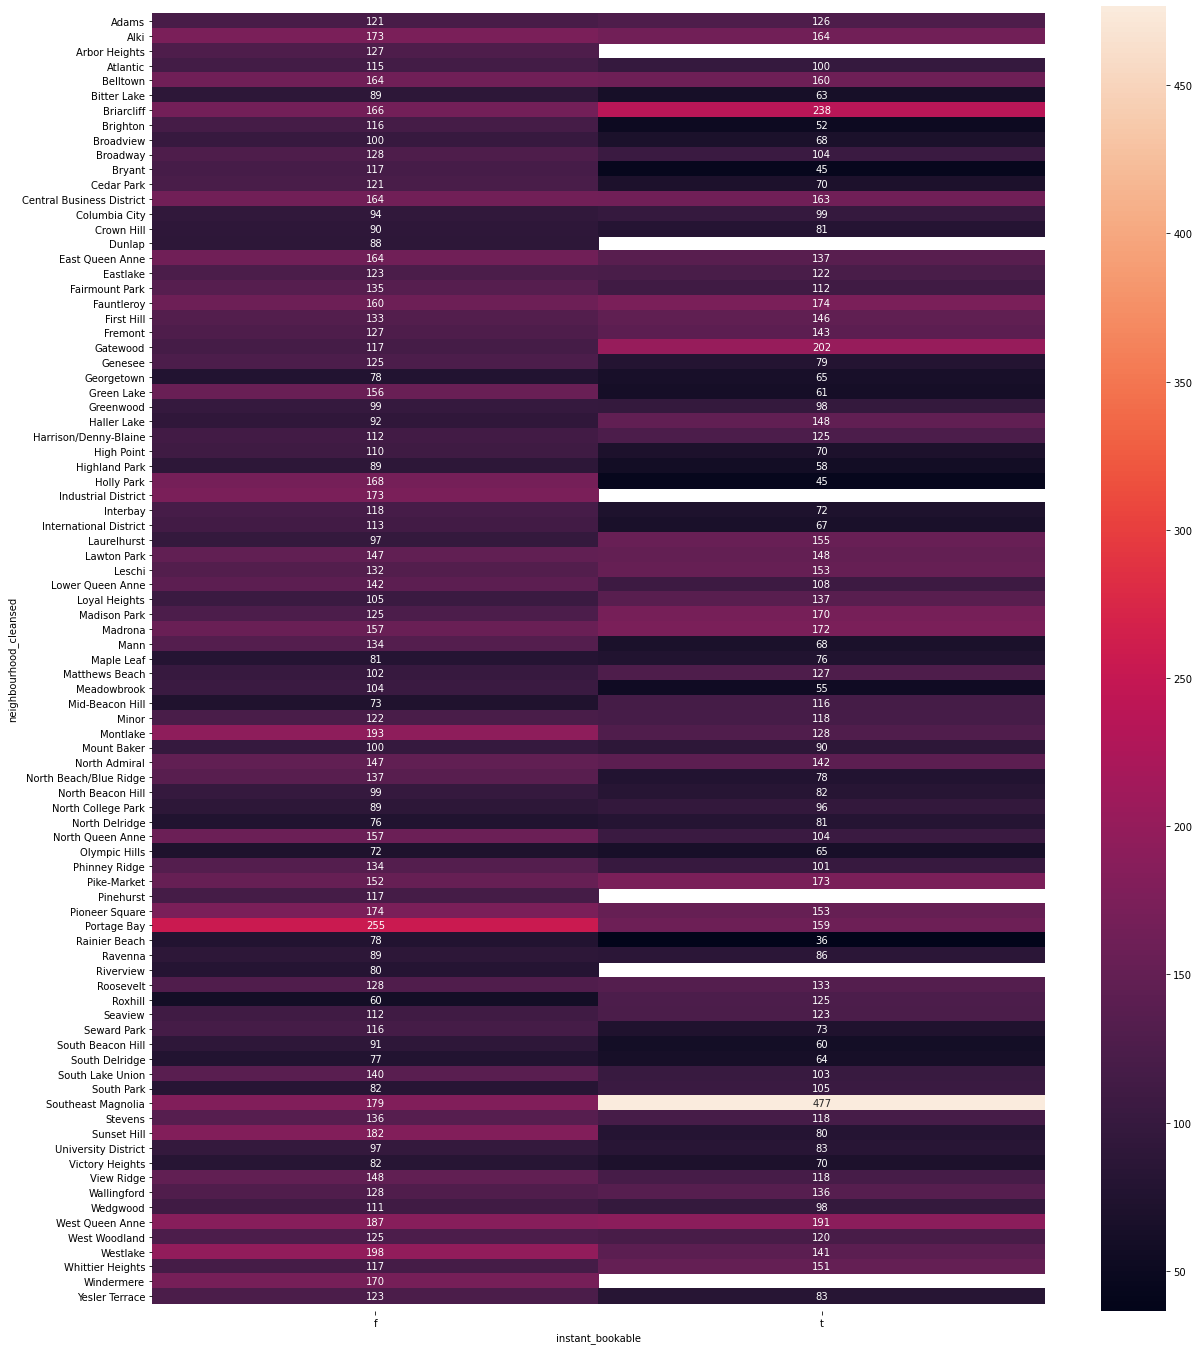

In [21]:
# instant_bookable in each neighborhood_cleansed (price)
plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'neighbourhood_cleansed', 'instant_bookable')

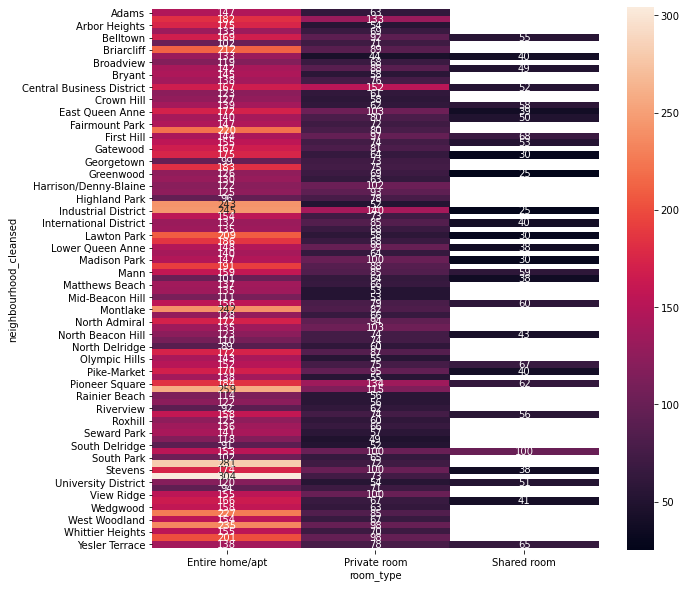

In [22]:
# neighborhood_cleansed to room_type
plt.figure(figsize=(10,10))
plot_heatmap_price(q1_df, 'neighbourhood_cleansed', 'room_type')

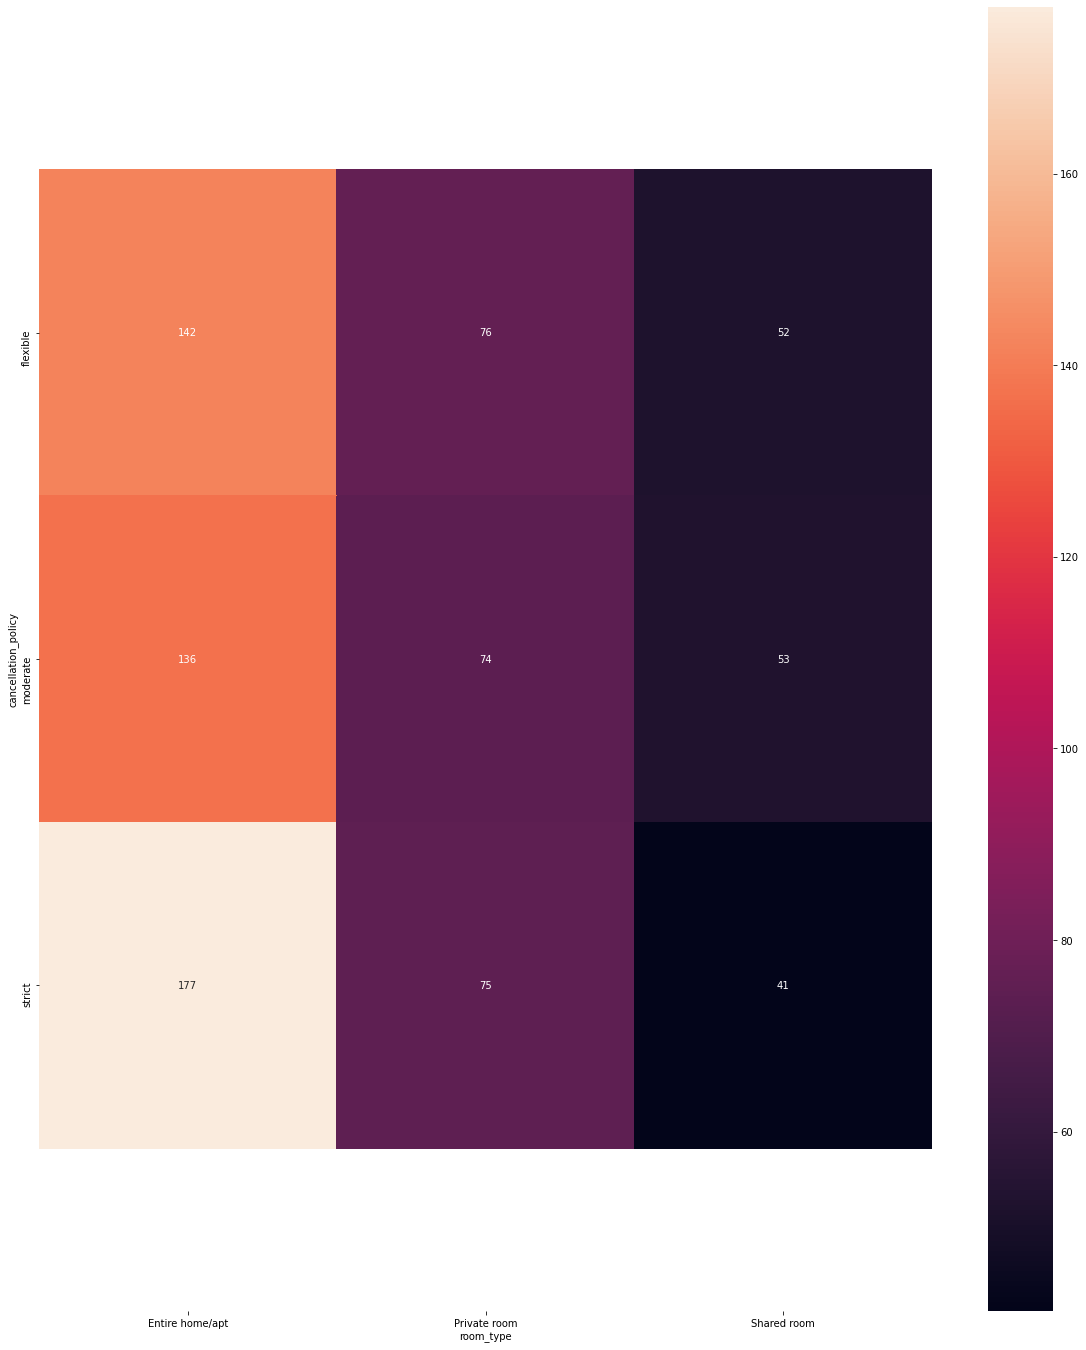

In [23]:
# cancellation_policy to room_type
plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'cancellation_policy', 'room_type')

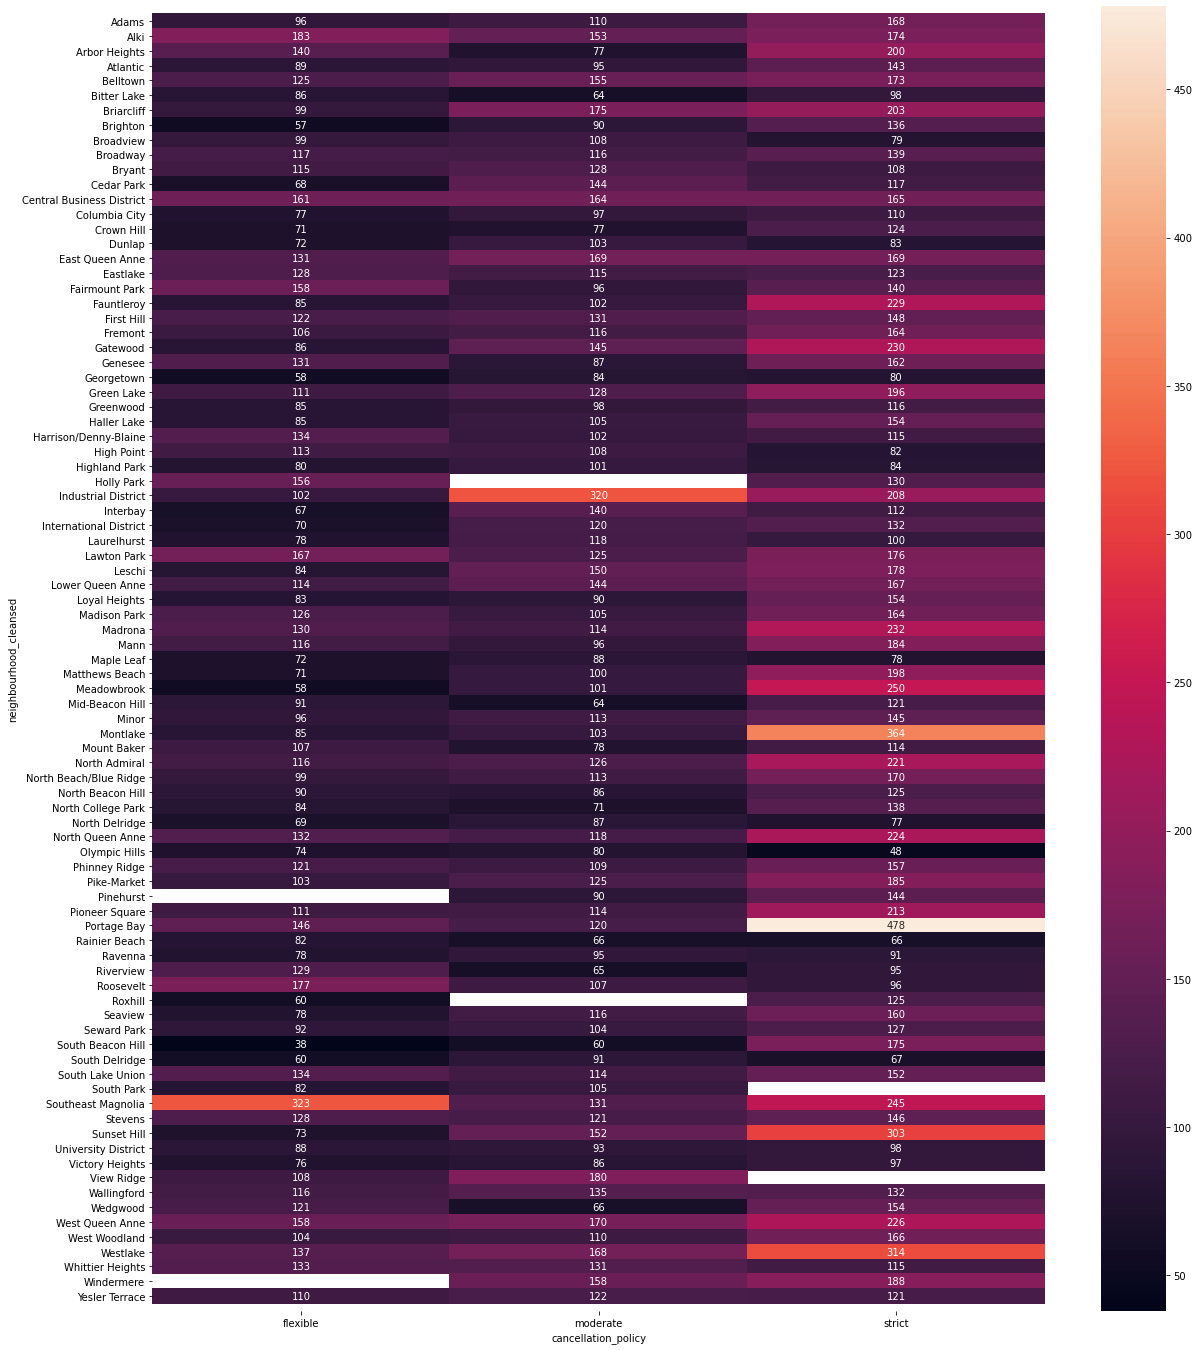

In [24]:
# cancellation_policy to neighborhood_cleansed
plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'neighbourhood_cleansed', 'cancellation_policy')


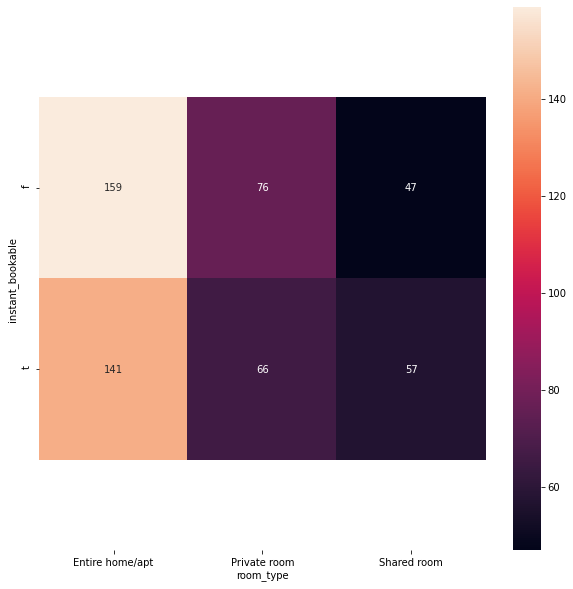

In [25]:
# instant_bookable in each property_type/ room_type
plt.figure(figsize=(10,10))
plot_heatmap_price(q1_df, 'instant_bookable', 'room_type')

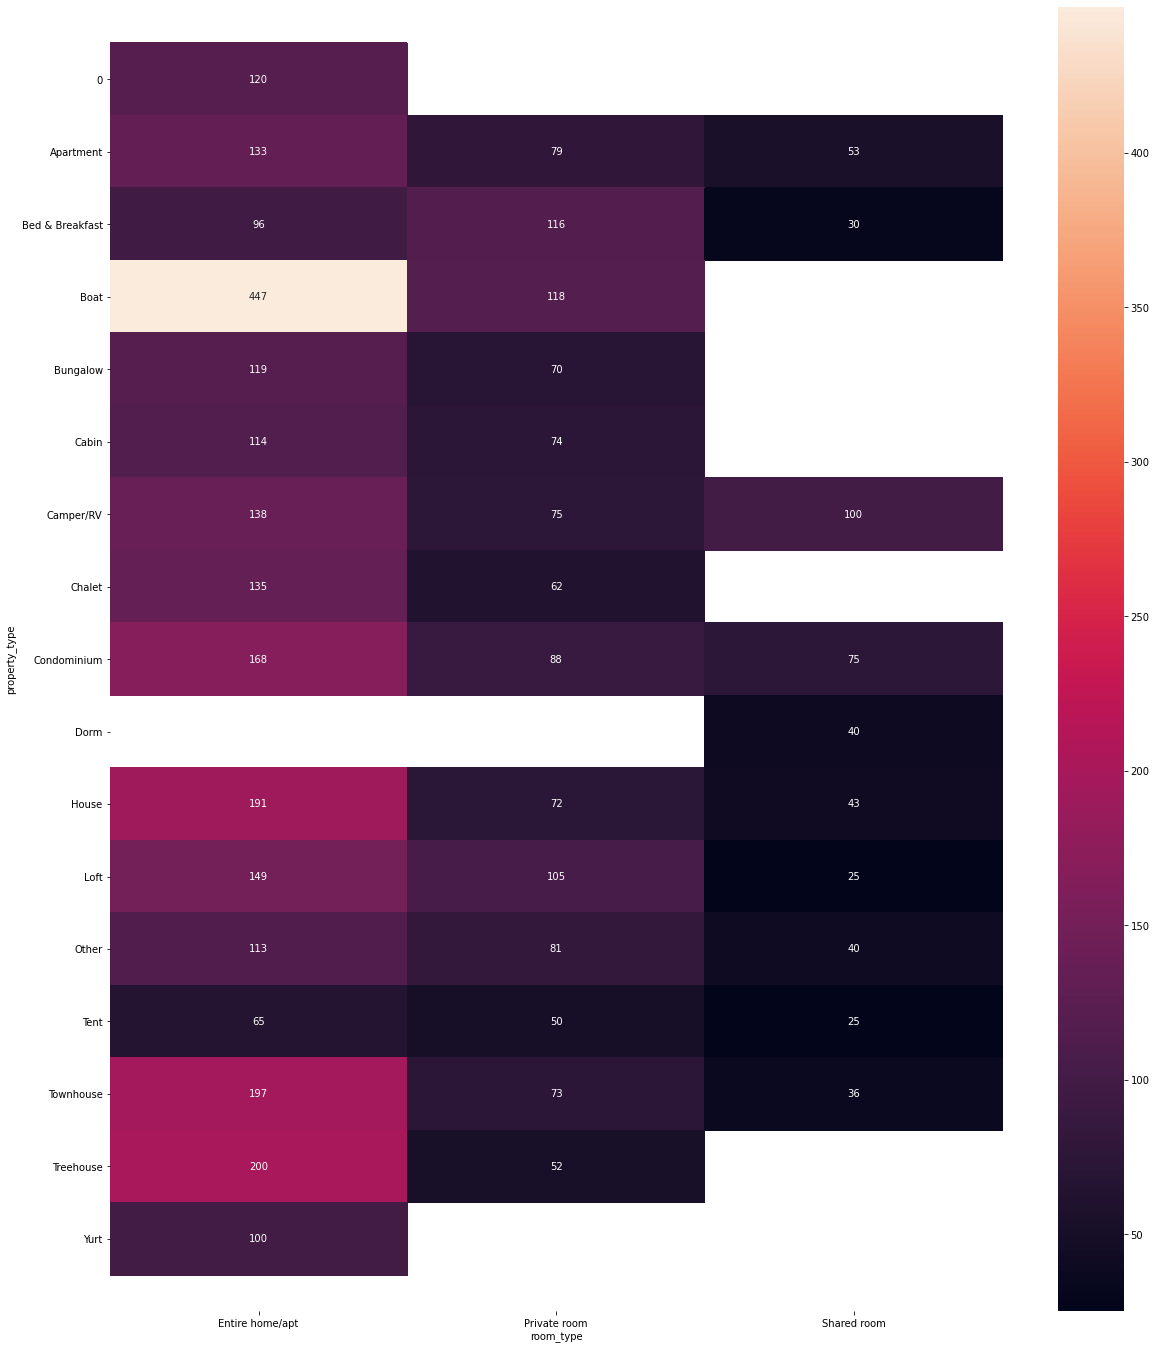

In [26]:
# room_type in each property_type
plt.figure(figsize=(20,24))
plot_heatmap_price(q1_df, 'property_type', 'room_type')

### So what?
The data suggests that these factors seem to consistently affect the price:
- the number of bedrooms,  (i.e. accomondation size)
- NOT the number of beds, because that could imply shared rooms (small spaces for many people)
- type of accomodation (e.g. boat > house > apartment > room)

## Q2. When is the busiest time in Seattle?


In [27]:
cal_df['availability_rate'] = cal_df['available'] == 't'
cal_df.head()

,listing_id,date,available,price,month,year,month_year,availability_rate
0,241032,2016-01-04,t,85.0,1,2016,2016-01,True
1,241032,2016-01-05,t,85.0,1,2016,2016-01,True
2,241032,2016-01-06,f,NaN,1,2016,2016-01,False
3,241032,2016-01-07,f,NaN,1,2016,2016-01,False
4,241032,2016-01-08,f,NaN,1,2016,2016-01,False


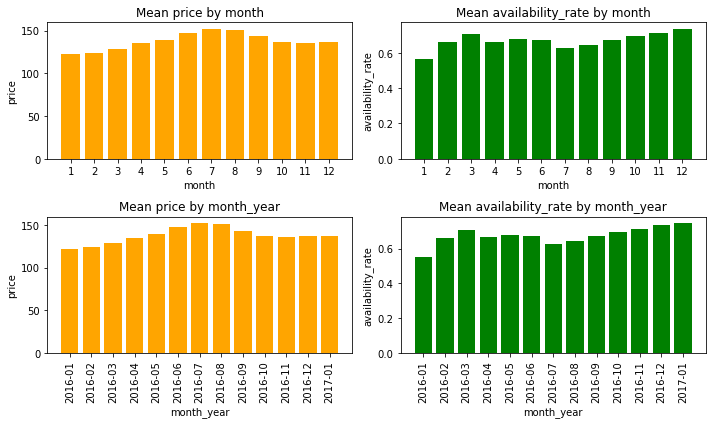

In [28]:
plt.figure(figsize=(10,6))
# availability rate by month, month_year
x = ['month', 'month_year']
y = ['price', 'availability_rate']
color = ['orange', 'green']

for ix in range(len(x)):
    gby = cal_df.groupby(x[ix])
    gby_df = gby.mean()
    gby_df['x'] = gby_df.index.to_series().astype(str)
    
    for iy in range(len(y)):
        plt.subplot(2,2, ix*2 + iy + 1)
        plt.bar(gby_df['x'], gby_df[y[iy]], color=[color[iy]]*len(gby_df))

        plt.title(f"Mean {y[iy]} by {x[ix]}")
        plt.xlabel(x[ix])
        plt.ylabel(y[iy])
        
        if (ix == 1): plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## So what?
Nothing really stands out from this graph. Mostly we can see that during Summer break (and maybe Spring break) that there is a dip in availability rate. Other than that, the data could not provide any further insight.

## Q3. What should you write in your "Summary"?
For this, we're gonna have to do some NLP to figure out some common themes.

In [29]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import string

# static components
string_punctuation = string.punctuation
ignore_char=['\r',"'s", "'ve",'\n','',' ',]
nums=['0','1','2','3','4','5','6','7','8','9']

def prepare_text(df, col_name='summary'):
    '''
    To only be used with Text. Any number-format (other than 0) will cause an error
    due to the line { words += row[col_name] }
    '''
    words=''
    for index,row in df.iterrows():
        if row[col_name] == 0:
            continue
        words += row[col_name]
    tokens= nltk.word_tokenize(words)
    
    # filters using list comprehension
    words_only = [l.lower() for l in tokens if l not in string_punctuation if l not in ignore_char if l not in nums]
    filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
    
    lemmatizer = WordNetLemmatizer() 
    final_data=[lemmatizer.lemmatize(data) for data in filtered_data]
    prepared_words=' '.join(final_data)
    return prepared_words

def plot_cloud(text_list, title = None):
    '''
    draw wordcloud with title
    '''
    plt.figure(figsize=(15,12))
    wc = WordCloud(width = 666, height = 444).generate(text_list)
    plt.imshow(wc)
    if title:
        plt.title(title)
    plt.axis("off")

In [30]:
summary_words = prepare_text(q1_df, 'summary')

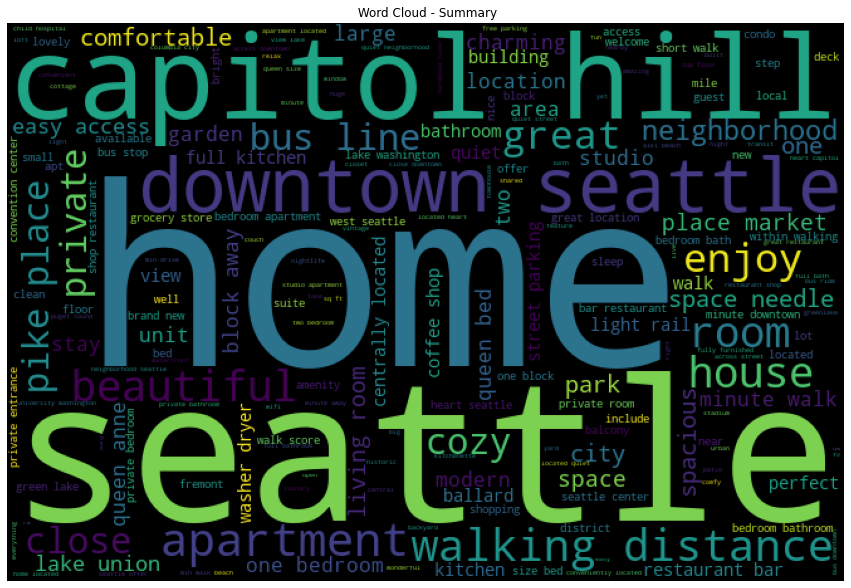

In [31]:
plot_cloud(summary_words," Word Cloud - Summary")

plt.show()

We could see that there are a lot of words relating to locations like "downtown seattle", "seattle", "capitol hill". Now ignoring all of that, we can see that hosts tend to use words like "home", "walking distance", "apartment". Let's try to remove these 3 big strings and narrow the words down.

In [32]:
rest = str(summary_words)
for k in ['downtown seattle',"seattle", "capitol hill", "home"]:
    rest = rest.replace(k, '')
print(len(summary_words), len(rest))

640476 612159


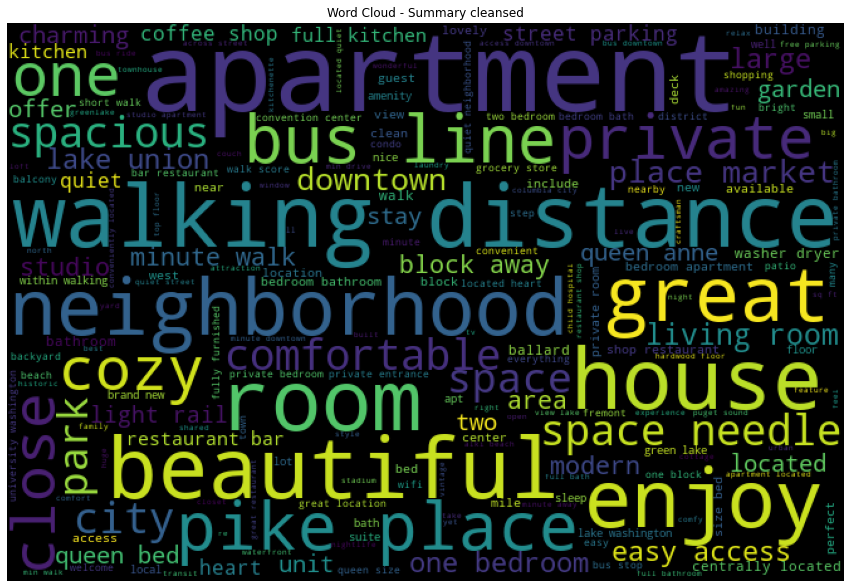

In [33]:
plot_cloud(rest, "Word Cloud - Summary cleansed")

Right! We can see more keywords now, like "apartment", "neighborhood", "walking distance", "bus line". Also, we have some more expressive keywords like "private", "great", "enjoy", "comfortable", "beautiful". This is the norm considering that the nature of Airbnb is not "luxury", but "cozy, private" and within walking distance to the entertainments or services of the city.

### Splitting prices into 3 groups - low, middle, high
Let's try to look into the main keywords for each price range - low, middle, high. For the sake of simplicity, I will split it according to the distribution plot, which is not exactly the best way to split prices into 3 groups. To give a definite definition to each group range choice, it might be better to apply statistical techniques.

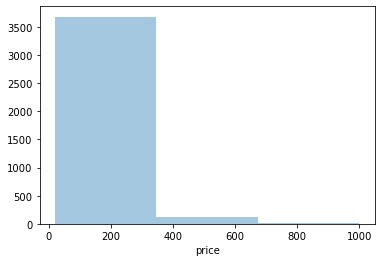

In [39]:
# graph price distribution
sns.distplot(q1_df["price"], bins=3, kde=False)
# for when seaborn changes and remove .displot()
# sns.displot(q1_df, x="price", bins=3)

In [41]:
price_list = q1_df.price
max_p = max(price_list)
min_p = min(price_list)
price_marks = [min_p, (max_p+min_p)/3, (max_p+min_p)/3 * 2,max_p]
print(price_marks)

[20.0, 340.0, 680.0, 1000.0]


In [42]:
# choosing the 3 groups:
low_range_df = q1_df.loc[(q1_df.price < price_marks[1]), :]
mid_range_df = q1_df.loc[(q1_df.price < price_marks[2]) & (q1_df.price >= price_marks[1]), :]
high_range_df = q1_df.loc[(q1_df.price < price_marks[3]) & (q1_df.price >= price_marks[2]), :]
high_range_df

,id,name,summary,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,16708587,Jill,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
19,6291829,Grand Craftsman Home on Queen Anne,This home built in 1909. It has 5 bedrooms a...,This home encompasses the character that is so...,This home built in 1909. It has 5 bedrooms a...,f,Upper Queen Anne is a charming neighborhood wi...,West Queen Anne,32713558,Kary,...,Entire home/apt,10,3.5,5.0,5.0,0.82,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,""Fr...",flexible,5,700.0
239,7733192,"Luxurious, Modern, Panoramic Views",A Contemporary Retreat with Stunning Views s ...,"Light, big windows, open spaces , views and co...",A Contemporary Retreat with Stunning Views s ...,f,10 minutes walk to the restaurants and shoppin...,East Queen Anne,24633415,David,...,Entire home/apt,8,3.5,3.0,3.0,2.67,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,12,749.0
319,3066740,The Silhouette - Lake Union Seattle,Enjoy your stay in Seattle by staying on Lake ...,The Silhouette is a 63ft power yacht. Kitchen ...,Enjoy your stay in Seattle by staying on Lake ...,t,Located on Lake Union 2 minutes from Gas Works...,Wallingford,15606907,"Karen, Chip & Karl",...,Entire home/apt,6,3.0,3.0,3.0,0.89,"{TV,""Cable TV"",""Air Conditioning"",Kitchen,""Fre...",flexible,6,680.0
565,5534463,70' Yacht on south Lake Union,70' yacht available for your business or vacat...,"1800 sq. feet of space, with 4 staterooms, all...",70' yacht available for your business or vacat...,f,"Waterfront, by Pike Place Market , and the Se...",Westlake,19861136,Chuck,...,Entire home/apt,8,4.0,4.0,6.0,0.92,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,9,775.0
1208,3345341,100% Walk Score 1-BR Downtown,100% Walk Score close to the Convention Center...,The space seeks to feel like home while giving...,100% Walk Score close to the Convention Center...,f,This neighborhood is AWESOME! We are: - 1 stre...,Belltown,3906464,Amy,...,Entire home/apt,4,1.0,1.0,1.0,2.89,"{Internet,""Wireless Internet"",Kitchen,""Elevato...",moderate,54,999.0
1279,4464824,Penthouse Suite Top Floor,Fully updated by professional interior designe...,Best location! Right in the middle of all the ...,Fully updated by professional interior designe...,t,"I love the people, restaurants and excitement ...",Belltown,23165254,Jason,...,Entire home/apt,10,2.0,3.0,4.0,0.36,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,5,899.0
1298,9497431,Sky High Water View. 99 Walkscore,Best place to ring in the new year with the *b...,"Comes with two king beds, 3 bathrooms and up t...",Best place to ring in the new year with the *b...,f,0,Belltown,8534462,Daniela,...,Entire home/apt,8,2.5,2.0,4.0,0.00,"{TV,Internet,""Wireless Internet"",""Air Conditio...",strict,0,700.0
1312,8891577,Sky High Penthouse. 99 Walkscore,Remarkable space and location. Just under 2000...,"Great for restaurants, shopping e.t.c. Nordstr...",Remarkable space and location. Just under 2000...,f,0,Belltown,8534462,Daniela,...,Entire home/apt,8,2.0,2.0,4.0,0.81,"{TV,Internet,""Wireless Internet"",""Air Conditio...",strict,1,700.0
2518,2459519,Fabulous Views of Lakes & Mountains,"Centrally located, minutes to downtown. Views ...",Welcome! Our house is ideally located for visi...,"Centrally located, minutes to downtown. Views ...",f,Roanoke/Portage Bay is one of Seattle's oldest...,Portage Bay,12575330,Megan,...,Entire home/apt,10,4.0,6.0,7.0,1.46,"{TV,""Cable TV"",Internet,""Wireless Internet"",

In [43]:
# split q1_df into 3
# WARNING: WILL TAKE A WHILE

# LOW
low_price_words = prepare_text(low_range_df)

# MID
middle_price_words = prepare_text(mid_range_df)

# HIGH
high_price_words =  prepare_text(high_range_df)

high_price_words

"new modern house built 2013 spectacular sunset/water view light rooftop deck lounge area hot tub bedroom gourmet kitchen perfect 2-3 family walk downtown located highly desirable queen anne neighborhood.this home built 1909 bedroom 3.5 bath perfect family group modern convenience one block main street filled restaurant coffee shop block kerry park 's famous firework display.a contemporary retreat stunning view space needle seattle skyline lake union almost every room house perfectly located south slope queen anne minute walk main attraction seattle.enjoy stay seattle staying lake union right gas work park 15 minute walk fremont area fabulous view space needle 4th july firework lake union seattle double stateroom bath sleep 6.70 yacht available business vacation stay stateroom head shower 1800 sq foot space outstanding view city great location close point interest cruise area also available100 walk score close convention center westlake station pike place market amazon belltown capitol

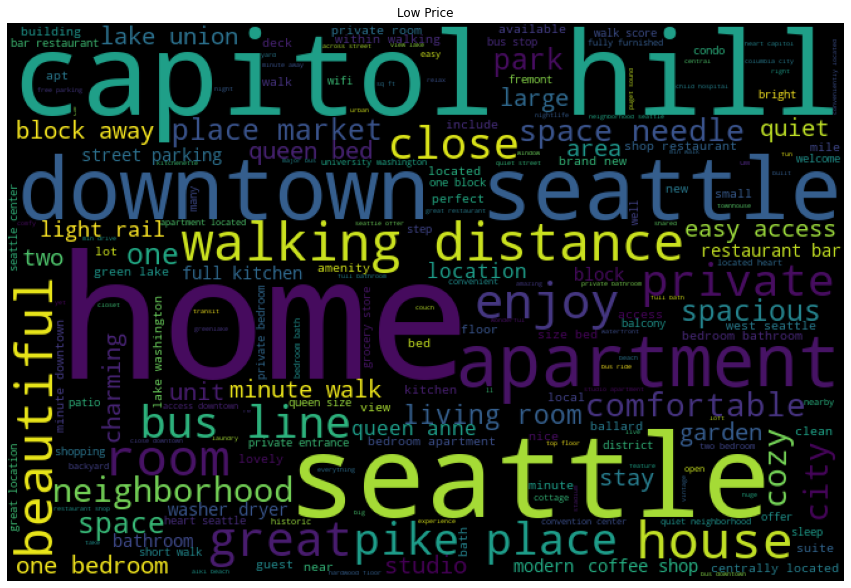

In [44]:
plot_cloud(low_price_words,"Low Price")

plt.show()

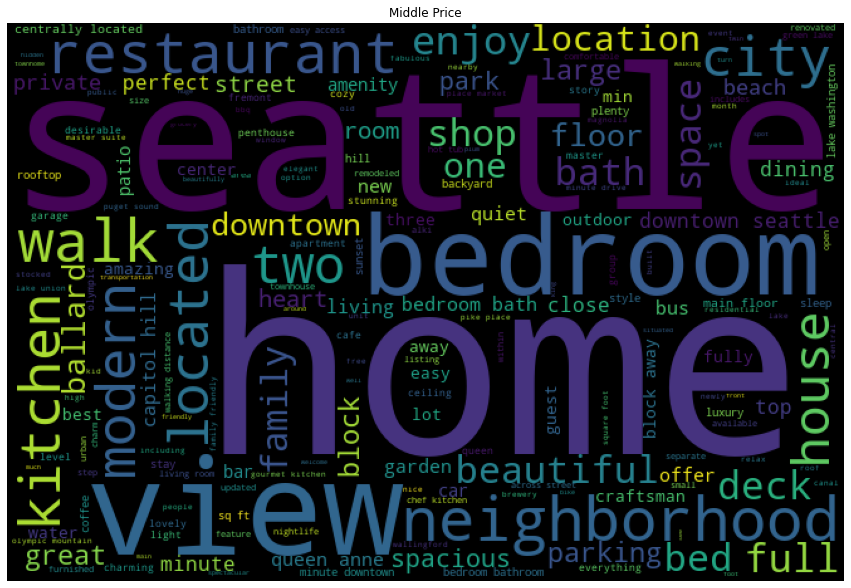

In [45]:
plot_cloud(middle_price_words,"Middle Price")

plt.show()

In [ ]:
plot_cloud(high_price_words,"High Price")

plt.show()

WOW, we could now see the differences between the summaries for different levels of price. For the Higher one, The thing that stood out the most was some locations like "Queen", "bay", "park", and the space itself like "bedroom", "view".
We could also see the use of adjectives in the low- and mid-price-range lodgings compared to high-end ones.
From this we could infer 3 (seemingly obvious) attributes of these keywords from the word clouds:
1. Features of the lodging
2. Proximity to landmarks/services of interest
3. Descriptive + Embellishing words/Hyperbole

where (1) and (2) might intersect at Location. Being in "Downtown Seattle" could both be a feature of the place, as well as implying a walking distance to the main attractions or services of Seattle. But we won't be digging to deep into that.
### Characteristic of "Summary"
- Low: Use more adjectives like "beautiful" and "great" to embellish, use the word 'Home' and 'comfortable' more frequently, and has more details in the description of the features of the lodging
- Middle: Seems to be in between Low and High.More features description but not alot of embelishment.
- High: Not a lot of Embelisshing adjectives, mostly focus on the exclusive featuers (like "great View") that it provide and the Proximity to locations, like lake, park, space needles.

# Conclusion
"More" does not mean "better". Some factors that affect costs in this way include:
+ Number of bedrooms (NOT the number of beds), or space-per-person
+  Type ← Whole Boats and Houses costs more than apartments/shared spaces.

Summer time (June - August) seems to be the busiest time, although not by a large margin.


For places with lower price range, it's common to add adjective to describe how home-like and convenient the location is (being in walking distance to bus-station). 


And as you go higher on the price range, it's common to list out the accommodations and features of the place.